# Foraging toolkit demo - follower birds

## Outline
* [Introduction](#introduction)
* [Simulation](#simulation)
* [Derived quantities](#derived-quantities)
* [Inference](#inference)

## Introduction

In this notebook we use the foraging toolkit to simulate agents that move toward other agents. 

The users are advised to familiarize themselves first with the `random_foragers.ipynb` demo, which contains a detailed explanation of the various commands and methods used in this notebook.

The follower behavior is in contrast to _hungry agents_, who care only about food location (see the `hungry_foragers.ipynb` demo notebook).

The main reference is [1], in particular Fig.2.

---

[1] R. Urbaniak, M. Xie, and E. Mackevicius, “Linking cognitive strategy, neural mechanism, and movement statistics in group foraging behaviors,” Sci Rep, vol. 14, no. 1, p. 21770, Sep. 2024, [doi: 10.1038/s41598-024-71931-0.](https://www.nature.com/articles/s41598-024-71931-0)

In [1]:
# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import dill
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio

pio.renderers.default = "notebook"

import collab.foraging.toolkit as ft
from collab.foraging import random_hungry_followers as rhf

logging.basicConfig(format="%(message)s", level=logging.INFO)

# users can ignore smoke_test -- it's for automatic testing on GitHub,
# to make sure the notebook runs on future updates to the repository
smoke_test = "CI" in os.environ
num_frames = 5 if smoke_test else 50
num_svi_iters = 10 if smoke_test else 1000
num_samples = 10 if smoke_test else 1000

notebook_starts = time.time()

## Simulation


**Simulation of follower foragers**

- **Initialization**
    - Initialize the grid with a specified grid size
    - Randomly place `num_rewards` rewards
    - Normalize the probabilities for forager step size
- **Forward Simulation**
    - For each frame:
        - Update visibility for foragers
        - Compute proximity scores for all foragers, with local maxima at other foragers' locations and exponential decay.
        - For each forager:
            - Weight proximity scores with the forager's visibility scores
            - Sort accessible points by the above weighted score
            - Move forager to a randomly chosen position from among top 10 ranking points above

- **Update Rewards**
    - At each frame, remove a reward if a forager is next to it, starting from that frame onward.


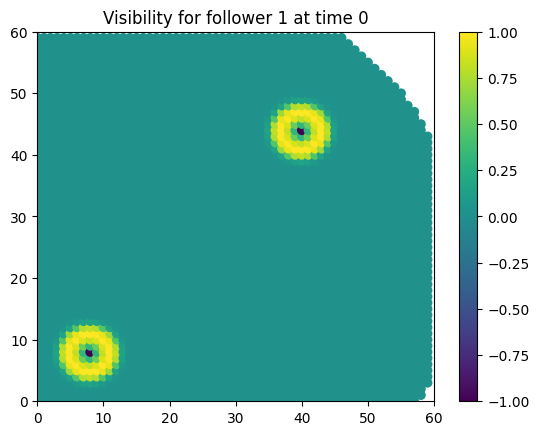

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
308    5   8  20.518285          14          15    0.754291        1     1   
491    8  11  16.278821          11          12    0.842850        1     1   
2441  40  41  27.658633          21          18    0.569032        1     1   
485    8   5  21.095023          11          18    0.740921        1     1   
668   11   8  17.000000           8          15    0.829038        1     1   
2264  37  44  27.658633          18          21    0.569032        1     1   
2624  43  44  31.890437          24          21    0.441805        1     1   
2447  40  47  31.890437          21          24    0.441805        1     1   
667   11   7  17.888544           8          16    0.811298        1     1   
2623  43  43  31.240999          24          20    0.462027        1     1   

      proximity  proximity_standardized  
308    1.000000                6.111881  
491    1.000000                6.111881  
2441   

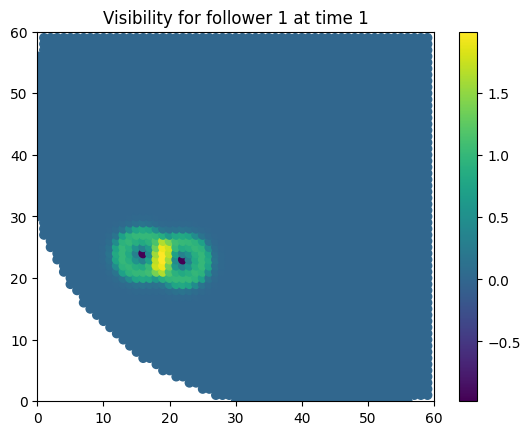

options       x   y   distance  distance_x  distance_y  visibility  forager  time  \
865  19  24  30.610456        24.0        19.0    0.481434        1     2   
864  19  23  31.240999        24.0        20.0    0.462027        1     2   
866  19  25  30.000000        24.0        18.0    0.500000        1     2   
863  19  22  31.890437        24.0        21.0    0.441805        1     2   
808  18  22  32.649655        25.0        21.0    0.417878        1     2   
921  20  25  29.206164        23.0        18.0    0.523803        1     2   
920  20  24  29.832868        23.0        19.0    0.505044        1     2   
809  18  23  32.015621        25.0        20.0    0.437881        1     2   
867  19  26  29.410882        24.0        17.0    0.517702        1     2   
862  19  21  32.557641        24.0        22.0    0.420794        1     2   

     proximity  proximity_standardized  
865   1.994806               10.557337  
864   1.994806               10.557337  
866   1.923293       

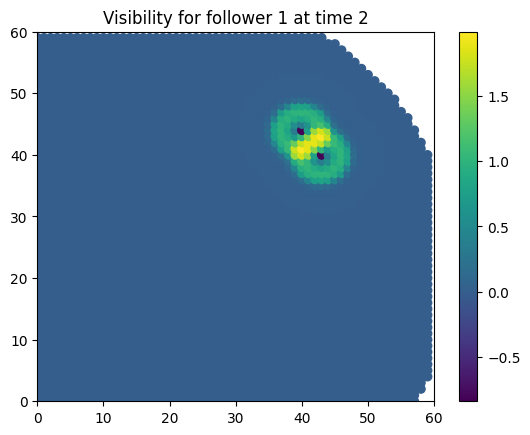

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2441  40  41  29.068884        22.0        19.0    0.527879        1     3   
2623  43  43  32.649655        25.0        21.0    0.417878        1     3   
2501  41  41  29.832868        23.0        19.0    0.505044        1     3   
2563  42  43  31.890437        24.0        21.0    0.441805        1     3   
2502  41  42  30.479501        23.0        20.0    0.485435        1     3   
2562  42  42  31.240999        24.0        20.0    0.462027        1     3   
2440  40  40  28.425341        22.0        18.0    0.546823        1     3   
2624  43  44  33.301652        25.0        22.0    0.397095        1     3   
2683  44  43  33.421550        26.0        21.0    0.393250        1     3   
2381  39  41  28.319605        21.0        19.0    0.549909        1     3   

      proximity  proximity_standardized  
2441   1.994806               10.491144  
2623   1.994806               10.491144  
2501   

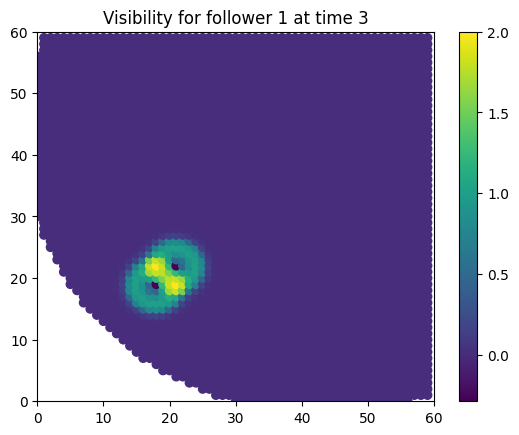

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
971   21  19  32.557641        22.0        24.0    0.420794        1     4   
808   18  22  32.649655        25.0        21.0    0.417878        1     4   
915   20  19  33.241540        23.0        24.0    0.399020        1     4   
754   17  22  33.421550        26.0        21.0    0.393250        1     4   
970   21  18  33.301652        22.0        25.0    0.397095        1     4   
972   21  20  31.827661        22.0        23.0    0.443770        1     4   
809   18  23  32.015621        25.0        20.0    0.437881        1     4   
807   18  21  33.301652        25.0        22.0    0.397095        1     4   
1027  22  19  31.890437        21.0        24.0    0.441805        1     4   
863   19  22  31.890437        24.0        21.0    0.441805        1     4   

      proximity  proximity_standardized  
971    2.000000               10.128504  
808    2.000000               10.128504  
915    

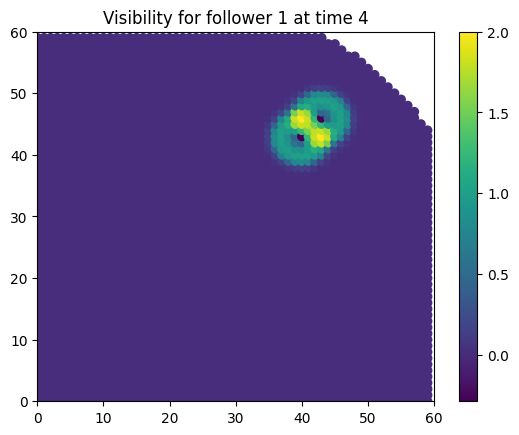

options        x   y   distance  distance_x  distance_y  visibility  forager  time  \
2623  43  43  31.827661        22.0        23.0    0.443770        1     5   
2446  40  46  32.202484        19.0        26.0    0.432008        1     5   
2622  43  42  31.112698        22.0        22.0    0.465994        1     5   
2506  41  46  32.802439        20.0        26.0    0.413027        1     5   
2445  40  45  31.400637        19.0        25.0    0.457078        1     5   
2386  39  46  31.622777        18.0        26.0    0.450168        1     5   
2624  43  44  32.557641        22.0        24.0    0.420794        1     5   
2447  40  47  33.015148        19.0        27.0    0.406254        1     5   
2563  42  43  31.144823        21.0        23.0    0.465002        1     5   
2683  44  43  32.526912        23.0        23.0    0.421767        1     5   

      proximity  proximity_standardized  
2623   2.000000               10.460228  
2446   2.000000               10.460228  
2622   

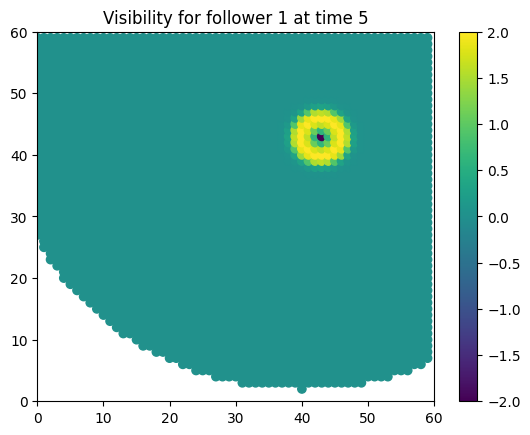

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2224  43  46  3.162278         3.0         1.0    0.993914        1     6   
2392  46  43  7.211103         6.0         4.0    0.968487        1     6   
2050  40  43  4.000000         0.0         4.0    0.990268        1     6   
2218  43  40  7.615773         3.0         7.0    0.964872        1     6   
2281  44  46  4.123106         4.0         1.0    0.989661        1     6   
2393  46  44  6.708204         6.0         3.0    0.972709        1     6   
2391  46  42  7.810250         6.0         5.0    0.963066        1     6   
2051  40  44  3.000000         0.0         3.0    0.994522        1     6   
2049  40  42  5.000000         0.0         5.0    0.984808        1     6   
2161  42  40  7.280110         2.0         7.0    0.967884        1     6   

      proximity  proximity_standardized  
2224   2.000000                8.221398  
2392   2.000000                8.221398  
2050   2.000000   

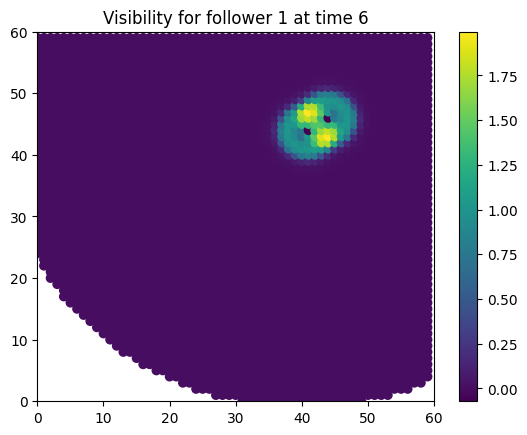

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2412  44  43  4.123106         4.0         1.0    0.989661        1     7   
2236  41  47  3.162278         1.0         3.0    0.993914        1     7   
2296  42  47  3.605551         2.0         3.0    0.992090        1     7   
2352  43  43  3.162278         3.0         1.0    0.993914        1     7   
2235  41  46  2.236068         1.0         2.0    0.996955        1     7   
2413  44  44  4.000000         4.0         0.0    0.990268        1     7   
2472  45  43  5.099020         5.0         1.0    0.984202        1     7   
2176  40  47  3.000000         0.0         3.0    0.994522        1     7   
2351  43  42  3.605551         3.0         2.0    0.992090        1     7   
2297  42  48  4.472136         2.0         4.0    0.987840        1     7   

      proximity  proximity_standardized  
2412   1.994806               10.015989  
2236   1.994806               10.015989  
2296   1.881805   

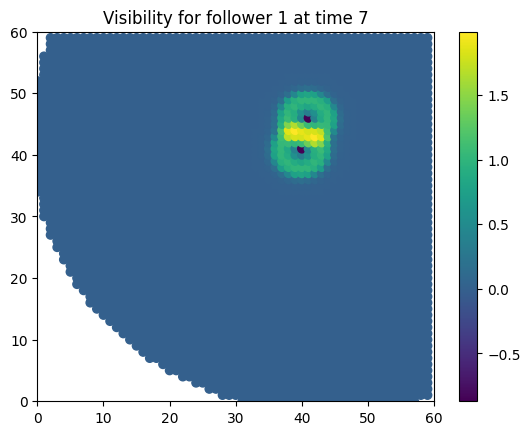

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2018  39  44  5.099020         5.0         1.0    0.984202        1     8   
2197  42  43  2.000000         2.0         0.0    0.997564        1     8   
2137  41  43  3.000000         3.0         0.0    0.994522        1     8   
2078  40  44  4.123106         4.0         1.0    0.989661        1     8   
1958  38  44  6.082763         6.0         1.0    0.977543        1     8   
2257  43  43  1.000000         1.0         0.0    0.999391        1     8   
2198  42  44  2.236068         2.0         1.0    0.996955        1     8   
2017  39  43  5.000000         5.0         0.0    0.984808        1     8   
2077  40  43  4.000000         4.0         0.0    0.990268        1     8   
2138  41  44  3.162278         3.0         1.0    0.993914        1     8   

      proximity  proximity_standardized  
2018   1.989001               10.134508  
2197   1.989001               10.134508  
2137   1.886998   

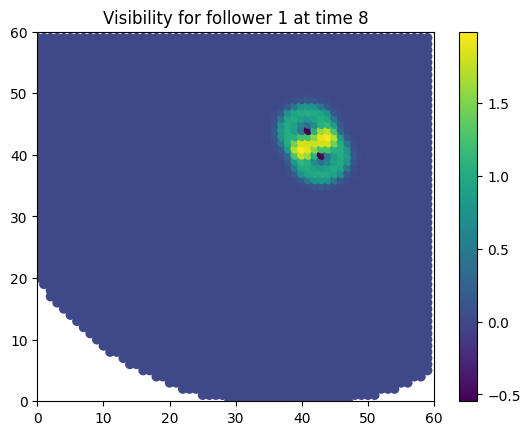

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2216  40  41  3.605551         2.0         3.0    0.992090        1     9   
2458  44  43  6.082763         6.0         1.0    0.977543        1     9   
2398  43  43  5.099020         5.0         1.0    0.984202        1     9   
2276  41  41  4.242641         3.0         3.0    0.989054        1     9   
2457  44  42  6.324555         6.0         2.0    0.975729        1     9   
2217  40  42  2.828427         2.0         2.0    0.995130        1     9   
2277  41  42  3.605551         3.0         2.0    0.992090        1     9   
2397  43  42  5.385165         5.0         2.0    0.982384        1     9   
2337  42  42  4.472136         4.0         2.0    0.987840        1     9   
2215  40  40  4.472136         2.0         4.0    0.987840        1     9   

      proximity  proximity_standardized  
2216   1.989613               10.206753  
2458   1.989613               10.206753  
2398   1.886998   

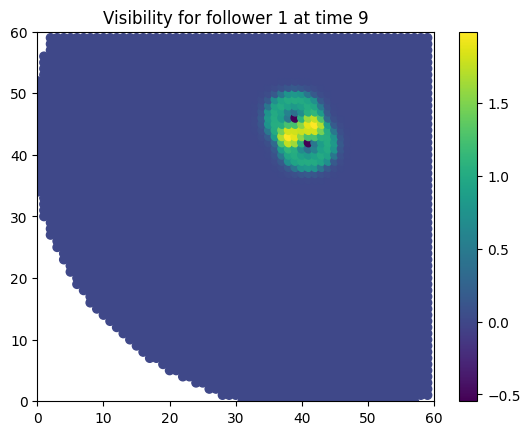

2024-10-29 20:08:20,382 - Generating frame 10/50 


options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
1957  38  43  6.000000         6.0         0.0    0.978148        1    10   
2199  42  45  2.828427         2.0         2.0    0.995130        1    10   
2139  41  45  3.605551         3.0         2.0    0.992090        1    10   
2017  39  43  5.000000         5.0         0.0    0.984808        1    10   
1958  38  44  6.082763         6.0         1.0    0.977543        1    10   
2198  42  44  2.236068         2.0         1.0    0.996955        1    10   
2018  39  44  5.099020         5.0         1.0    0.984202        1    10   
2138  41  44  3.162278         3.0         1.0    0.993914        1    10   
2078  40  44  4.123106         4.0         1.0    0.989661        1    10   
2200  42  46  3.605551         2.0         3.0    0.992090        1    10   

      proximity  proximity_standardized  
1957   1.989613               10.030694  
2199   1.989613               10.030694  
2139   1.886998   

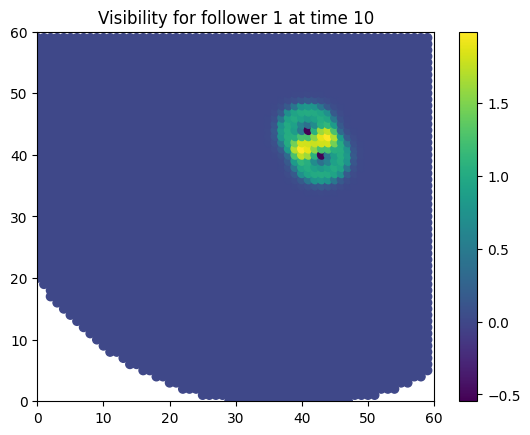

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2216  40  41  3.605551         2.0         3.0    0.992090        1    11   
2458  44  43  6.082763         6.0         1.0    0.977543        1    11   
2398  43  43  5.099020         5.0         1.0    0.984202        1    11   
2276  41  41  4.242641         3.0         3.0    0.989054        1    11   
2457  44  42  6.324555         6.0         2.0    0.975729        1    11   
2217  40  42  2.828427         2.0         2.0    0.995130        1    11   
2277  41  42  3.605551         3.0         2.0    0.992090        1    11   
2397  43  42  5.385165         5.0         2.0    0.982384        1    11   
2337  42  42  4.472136         4.0         2.0    0.987840        1    11   
2215  40  40  4.472136         2.0         4.0    0.987840        1    11   

      proximity  proximity_standardized  
2216   1.989613               10.206753  
2458   1.989613               10.206753  
2398   1.886998   

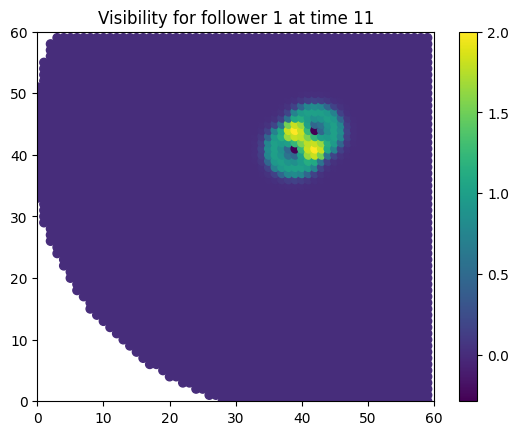

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2046  39  44  5.385165         5.0         2.0    0.982384        1    12   
2223  42  41  2.236068         2.0         1.0    0.996955        1    12   
1986  38  44  6.324555         6.0         2.0    0.975729        1    12   
2045  39  43  5.099020         5.0         1.0    0.984202        1    12   
2106  40  44  4.472136         4.0         2.0    0.987840        1    12   
2222  42  40  2.828427         2.0         2.0    0.995130        1    12   
2047  39  45  5.830952         5.0         3.0    0.979357        1    12   
2163  41  41  3.162278         3.0         1.0    0.993914        1    12   
2283  43  41  1.414214         1.0         1.0    0.998782        1    12   
2224  42  42  2.000000         2.0         0.0    0.997564        1    12   

      proximity  proximity_standardized  
2046   2.000000               10.112955  
2223   2.000000               10.112955  
1986   1.803823   

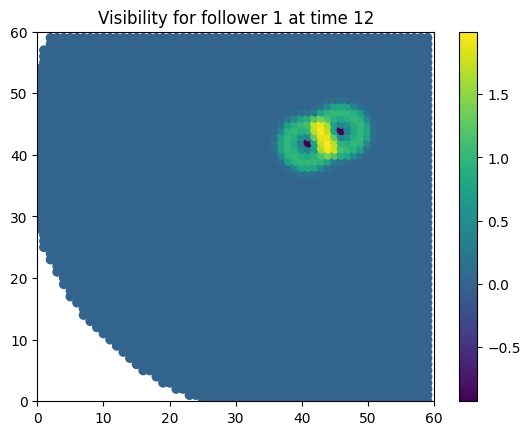

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2352  43  44  3.000000         0.0         3.0    0.994522        1    13   
2410  44  42  1.414214         1.0         1.0    0.998782        1    13   
2353  43  45  4.000000         0.0         4.0    0.990268        1    13   
2409  44  41  1.000000         1.0         0.0    0.999391        1    13   
2411  44  43  2.236068         1.0         2.0    0.996955        1    13   
2351  43  43  2.000000         0.0         2.0    0.997564        1    13   
2469  45  41  2.000000         2.0         0.0    0.997564        1    13   
2293  42  45  4.123106         1.0         4.0    0.989661        1    13   
2412  44  44  3.162278         1.0         3.0    0.993914        1    13   
2350  43  42  1.000000         0.0         1.0    0.999391        1    13   

      proximity  proximity_standardized  
2352   1.994195               10.386087  
2410   1.994195               10.386087  
2353   1.923293   

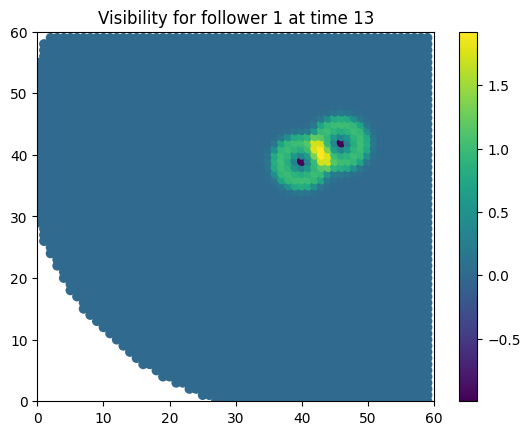

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2324  43  41  1.000000         0.0         1.0    0.999391        1    14   
2323  43  40  2.000000         0.0         2.0    0.997564        1    14   
2264  42  41  1.414214         1.0         1.0    0.998782        1    14   
2383  44  40  2.236068         1.0         2.0    0.996955        1    14   
2382  44  39  3.162278         1.0         3.0    0.993914        1    14   
2265  42  42  1.000000         1.0         0.0    0.999391        1    14   
2325  43  42  0.000000         0.0         0.0    1.000000        1    14   
2322  43  39  3.000000         0.0         3.0    0.994522        1    14   
2384  44  41  1.414214         1.0         1.0    0.998782        1    14   
2263  42  40  2.236068         1.0         2.0    0.996955        1    14   

      proximity  proximity_standardized  
2324   1.923293               10.513270  
2323   1.923293               10.513270  
2264   1.755373   

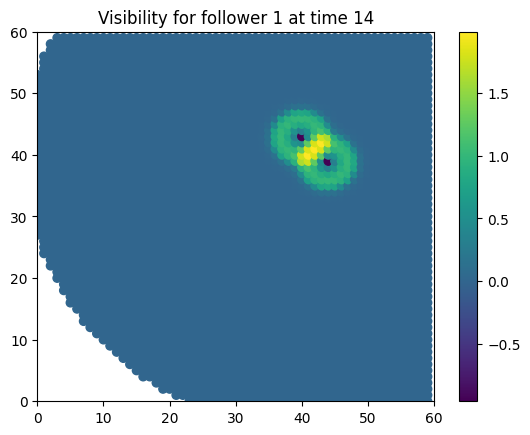

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2250  41  40  2.000000         2.0         0.0    0.997564        1    15   
2372  43  42  2.000000         0.0         2.0    0.997564        1    15   
2311  42  41  1.414214         1.0         1.0    0.998782        1    15   
2312  42  42  2.236068         1.0         2.0    0.996955        1    15   
2251  41  41  2.236068         2.0         1.0    0.996955        1    15   
2371  43  41  1.000000         0.0         1.0    0.999391        1    15   
2310  42  40  1.000000         1.0         0.0    0.999391        1    15   
2249  41  39  2.236068         2.0         1.0    0.996955        1    15   
2190  40  40  3.000000         3.0         0.0    0.994522        1    15   
2432  44  42  2.236068         1.0         2.0    0.996955        1    15   

      proximity  proximity_standardized  
2250   1.989613               10.482867  
2372   1.989613               10.482867  
2311   1.988390   

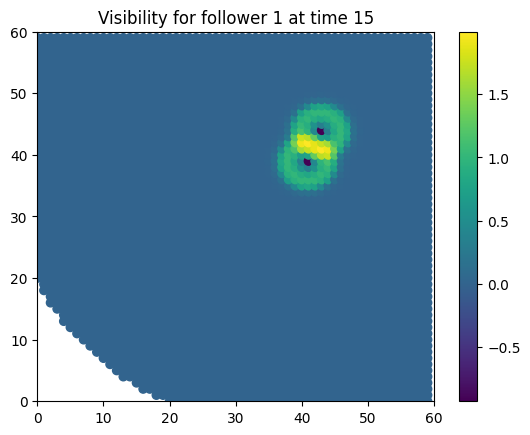

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2454  43  41  3.162278         3.0         1.0    0.993914        1    16   
2335  41  42  2.236068         1.0         2.0    0.996955        1    16   
2514  44  41  4.123106         4.0         1.0    0.989661        1    16   
2275  40  42  2.000000         0.0         2.0    0.997564        1    16   
2395  42  42  2.828427         2.0         2.0    0.995130        1    16   
2394  42  41  2.236068         2.0         1.0    0.996955        1    16   
2276  40  43  3.000000         0.0         3.0    0.994522        1    16   
2513  44  40  4.000000         4.0         0.0    0.990268        1    16   
2334  41  41  1.414214         1.0         1.0    0.998782        1    16   
2455  43  42  3.605551         3.0         2.0    0.992090        1    16   

      proximity  proximity_standardized  
2454   1.994195               10.549086  
2335   1.994195               10.549086  
2514   1.923293   

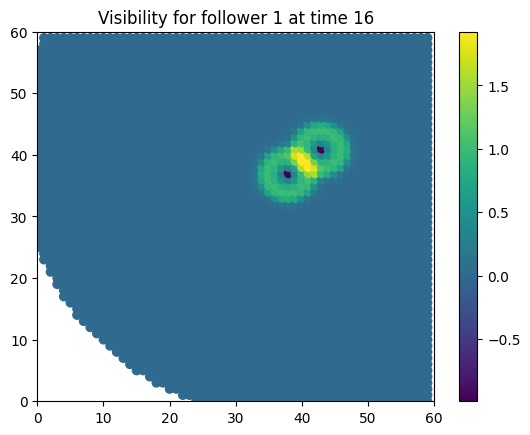

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2259  41  38  3.162278         1.0         3.0    0.993914        1    17   
2201  40  40  2.236068         2.0         1.0    0.996955        1    17   
2200  40  39  2.828427         2.0         2.0    0.995130        1    17   
2260  41  39  2.236068         1.0         2.0    0.996955        1    17   
2319  42  38  3.000000         0.0         3.0    0.994522        1    17   
2141  39  40  3.162278         3.0         1.0    0.993914        1    17   
2261  41  40  1.414214         1.0         1.0    0.998782        1    17   
2199  40  38  3.605551         2.0         3.0    0.992090        1    17   
2318  42  37  4.000000         0.0         4.0    0.990268        1    17   
2142  39  41  3.000000         3.0         0.0    0.994522        1    17   

      proximity  proximity_standardized  
2259   1.923293               10.455060  
2201   1.923293               10.455060  
2200   1.922682   

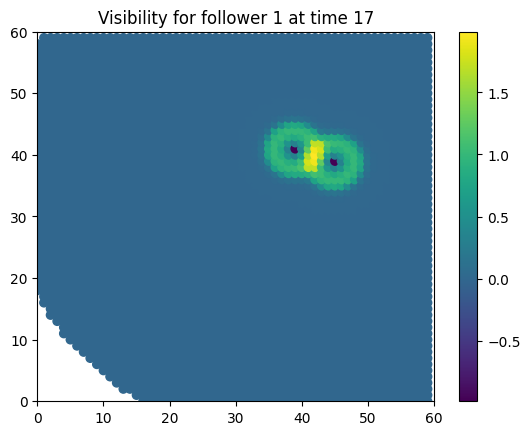

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2430  42  40  2.828427         2.0         2.0    0.995130        1    18   
2429  42  39  2.236068         2.0         1.0    0.996955        1    18   
2431  42  41  3.605551         2.0         3.0    0.992090        1    18   
2369  41  39  1.414214         1.0         1.0    0.998782        1    18   
2491  43  41  4.242641         3.0         3.0    0.989054        1    18   
2428  42  38  2.000000         2.0         0.0    0.997564        1    18   
2432  42  42  4.472136         2.0         4.0    0.987840        1    18   
2368  41  38  1.000000         1.0         0.0    0.999391        1    18   
2492  43  42  5.000000         3.0         4.0    0.984808        1    18   
2490  43  40  3.605551         3.0         2.0    0.992090        1    18   

      proximity  proximity_standardized  
2430   1.989613               10.955489  
2429   1.928487               10.613323  
2431   1.928487   

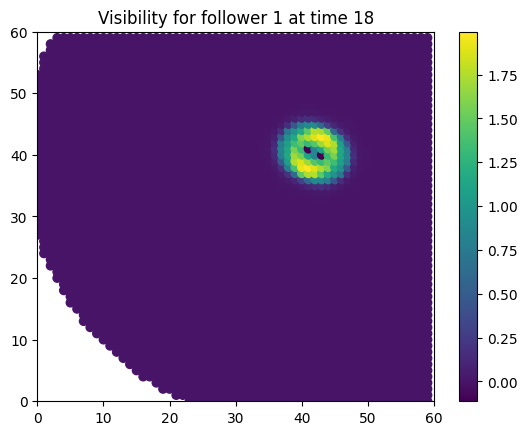

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2248  41  38  2.828427         2.0         2.0    0.995130        1    19   
2373  43  43  3.000000         0.0         3.0    0.994522        1    19   
2188  40  38  3.605551         3.0         2.0    0.992090        1    19   
2433  44  43  3.162278         1.0         3.0    0.993914        1    19   
2189  40  39  3.162278         3.0         1.0    0.993914        1    19   
2308  42  38  2.236068         1.0         2.0    0.996955        1    19   
2432  44  42  2.236068         1.0         2.0    0.996955        1    19   
2313  42  43  3.162278         1.0         3.0    0.993914        1    19   
2314  42  44  4.123106         1.0         4.0    0.989661        1    19   
2307  42  37  3.162278         1.0         3.0    0.993914        1    19   

      proximity  proximity_standardized  
2248   1.994195                9.443171  
2373   1.994195                9.443171  
2188   1.923293   

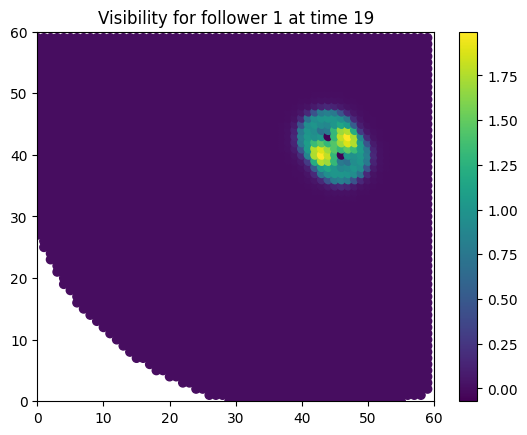

2024-10-29 20:08:22,099 - Generating frame 20/50 


options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2571  47  43  5.000000         5.0         0.0    0.984808        1    20   
2328  43  40  3.162278         1.0         3.0    0.993914        1    20   
2570  47  42  5.099020         5.0         1.0    0.984202        1    20   
2329  43  41  2.236068         1.0         2.0    0.996955        1    20   
2388  44  40  3.605551         2.0         3.0    0.992090        1    20   
2511  46  43  4.000000         4.0         0.0    0.990268        1    20   
2572  47  44  5.099020         5.0         1.0    0.984202        1    20   
2327  43  39  4.123106         1.0         4.0    0.989661        1    20   
2630  48  42  6.082763         6.0         1.0    0.977543        1    20   
2269  42  41  2.000000         0.0         2.0    0.997564        1    20   

      proximity  proximity_standardized  
2571   1.994806               10.006861  
2328   1.994806               10.006861  
2570   1.881805   

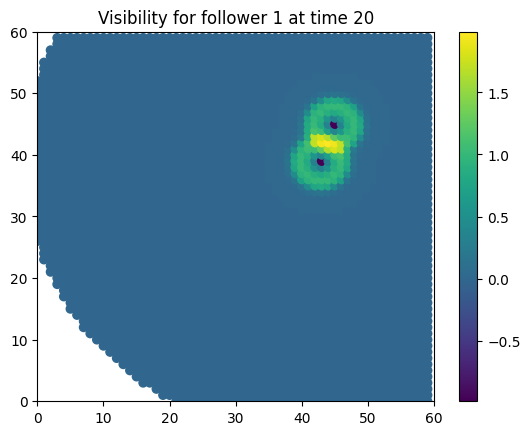

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2452  44  42  3.162278         1.0         3.0    0.993914        1    21   
2512  45  42  3.605551         2.0         3.0    0.992090        1    21   
2392  43  42  3.000000         0.0         3.0    0.994522        1    21   
2393  43  43  4.000000         0.0         4.0    0.990268        1    21   
2511  45  41  2.828427         2.0         2.0    0.995130        1    21   
2572  46  42  4.242641         3.0         3.0    0.989054        1    21   
2332  42  42  3.162278         1.0         3.0    0.993914        1    21   
2571  46  41  3.605551         3.0         2.0    0.992090        1    21   
2333  42  43  4.123106         1.0         4.0    0.989661        1    21   
2451  44  41  2.236068         1.0         2.0    0.996955        1    21   

      proximity  proximity_standardized  
2452   1.989613               10.796410  
2512   1.928487               10.459046  
2392   1.928487   

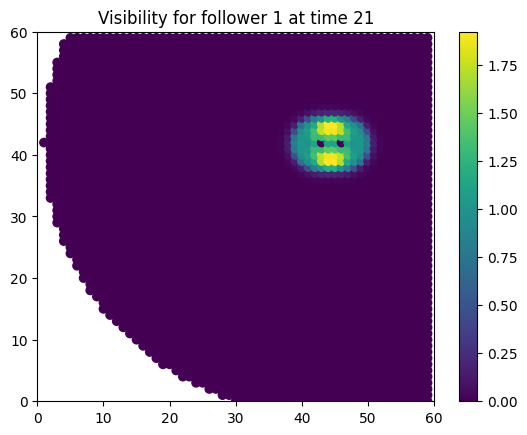

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2228  44  45  3.605551         2.0         3.0    0.992090        1    22   
2222  44  39  3.605551         2.0         3.0    0.992090        1    22   
2288  45  45  3.162278         1.0         3.0    0.993914        1    22   
2282  45  39  3.162278         1.0         3.0    0.993914        1    22   
2283  45  40  2.236068         1.0         2.0    0.996955        1    22   
2227  44  44  2.828427         2.0         2.0    0.995130        1    22   
2223  44  40  2.828427         2.0         2.0    0.995130        1    22   
2287  45  44  2.236068         1.0         2.0    0.996955        1    22   
2343  46  40  2.000000         0.0         2.0    0.997564        1    22   
2163  43  40  3.605551         3.0         2.0    0.992090        1    22   

      proximity  proximity_standardized  
2228   1.923293                9.197514  
2222   1.923293                9.197514  
2288   1.923293   

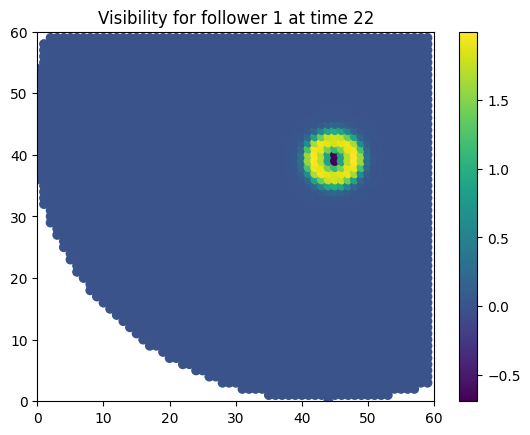

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2119  42  39  6.324555         2.0         6.0    0.975729        1    23   
2120  42  40  5.385165         2.0         5.0    0.982384        1    23   
2475  48  40  6.403124         4.0         5.0    0.975125        1    23   
2474  48  39  7.211103         4.0         6.0    0.968487        1    23   
2476  48  41  5.656854         4.0         4.0    0.980568        1    23   
2473  48  38  8.062258         4.0         7.0    0.960660        1    23   
2118  42  38  7.280110         2.0         7.0    0.967884        1    23   
2121  42  41  4.472136         2.0         4.0    0.987840        1    23   
2418  47  42  4.242641         3.0         3.0    0.989054        1    23   
2181  43  42  3.162278         1.0         3.0    0.993914        1    23   

      proximity  proximity_standardized  
2119   1.994806                8.484542  
2120   1.994806                8.484542  
2475   1.994806   

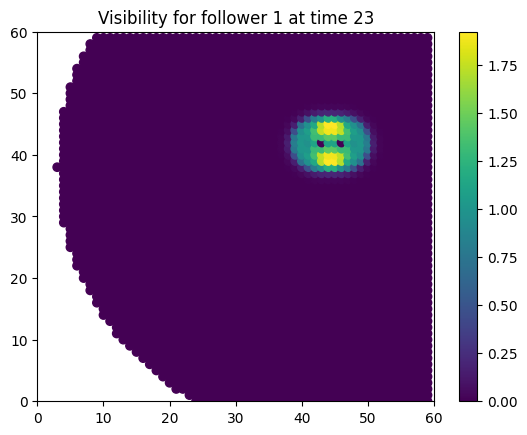

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2252  45  45  7.615773         3.0         7.0    0.964872        1    24   
2192  44  45  8.062258         4.0         7.0    0.960660        1    24   
2246  45  39  3.162278         3.0         1.0    0.993914        1    24   
2186  44  39  4.123106         4.0         1.0    0.989661        1    24   
2247  45  40  3.605551         3.0         2.0    0.992090        1    24   
2251  45  44  6.708204         3.0         6.0    0.972709        1    24   
2191  44  44  7.211103         4.0         6.0    0.968487        1    24   
2187  44  40  4.472136         4.0         2.0    0.987840        1    24   
2311  46  44  6.324555         2.0         6.0    0.975729        1    24   
2131  43  44  7.810250         5.0         6.0    0.963066        1    24   

      proximity  proximity_standardized  
2252   1.923293                9.144277  
2192   1.923293                9.144277  
2246   1.923293   

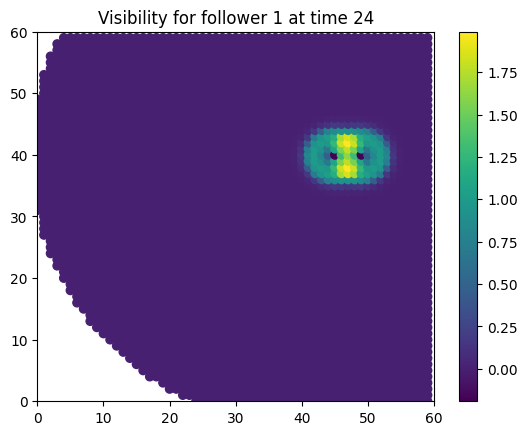

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2571  47  42  3.605551         3.0         2.0    0.992090        1    25   
2567  47  38  3.605551         3.0         2.0    0.992090        1    25   
2572  47  43  4.242641         3.0         3.0    0.989054        1    25   
2566  47  37  4.242641         3.0         3.0    0.989054        1    25   
2631  48  42  4.472136         4.0         2.0    0.987840        1    25   
2627  48  38  4.472136         4.0         2.0    0.987840        1    25   
2511  46  42  2.828427         2.0         2.0    0.995130        1    25   
2507  46  38  2.828427         2.0         2.0    0.995130        1    25   
2568  47  39  3.162278         3.0         1.0    0.993914        1    25   
2570  47  41  3.162278         3.0         1.0    0.993914        1    25   

      proximity  proximity_standardized  
2571   1.988390               10.091729  
2567   1.988390               10.091729  
2572   1.856974   

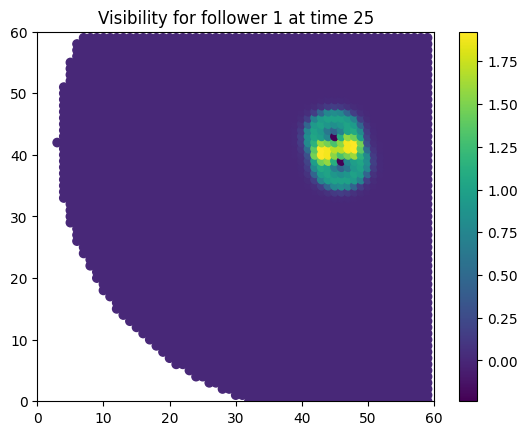

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2345  48  42  0.000000         0.0         0.0    1.000000        1    26   
2043  43  40  5.385165         5.0         2.0    0.982384        1    26   
2344  48  41  1.000000         0.0         1.0    0.999391        1    26   
2044  43  41  5.099020         5.0         1.0    0.984202        1    26   
2285  47  42  1.000000         1.0         0.0    0.999391        1    26   
2103  44  40  4.472136         4.0         2.0    0.987840        1    26   
2284  47  41  1.414214         1.0         1.0    0.998782        1    26   
2104  44  41  4.123106         4.0         1.0    0.989661        1    26   
2164  45  41  3.162278         3.0         1.0    0.993914        1    26   
2224  46  41  2.236068         2.0         1.0    0.996955        1    26   

      proximity  proximity_standardized  
2345   1.923293                9.339570  
2043   1.923293                9.339570  
2344   1.922682   

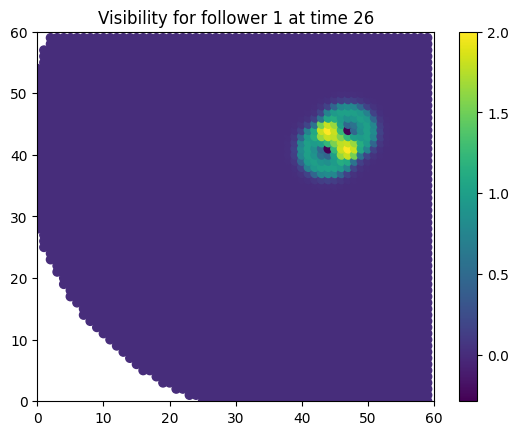

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2589  47  41  4.000000         4.0         0.0    0.990268        1    27   
2412  44  44  3.162278         1.0         3.0    0.993914        1    27   
2588  47  40  4.123106         4.0         1.0    0.989661        1    27   
2411  44  43  2.236068         1.0         2.0    0.996955        1    27   
2413  44  45  4.123106         1.0         4.0    0.989661        1    27   
2649  48  41  5.000000         5.0         0.0    0.984808        1    27   
2590  47  42  4.123106         4.0         1.0    0.989661        1    27   
2472  45  44  3.605551         2.0         3.0    0.992090        1    27   
2352  43  44  3.000000         0.0         3.0    0.994522        1    27   
2529  46  41  3.000000         3.0         0.0    0.994522        1    27   

      proximity  proximity_standardized  
2589   2.000000               10.215140  
2412   2.000000               10.215140  
2588   1.803823   

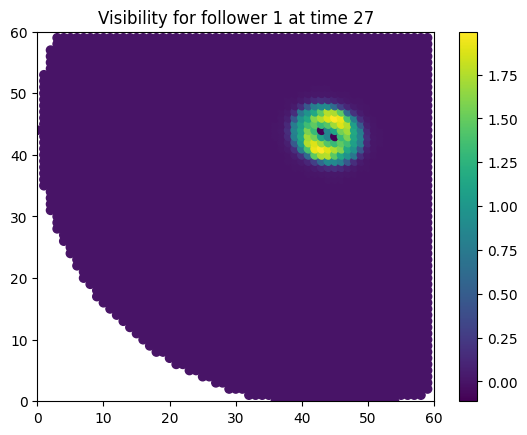

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2163  43  41  3.605551         2.0         3.0    0.992090        1    28   
2288  45  46  2.000000         0.0         2.0    0.997564        1    28   
2103  42  41  4.242641         3.0         3.0    0.989054        1    28   
2348  46  46  2.236068         1.0         2.0    0.996955        1    28   
2228  44  46  2.236068         1.0         2.0    0.996955        1    28   
2223  44  41  3.162278         1.0         3.0    0.993914        1    28   
2104  42  42  3.605551         3.0         2.0    0.992090        1    28   
2347  46  45  1.414214         1.0         1.0    0.998782        1    28   
2229  44  47  3.162278         1.0         3.0    0.993914        1    28   
2222  44  40  4.123106         1.0         4.0    0.989661        1    28   

      proximity  proximity_standardized  
2163   1.994195                9.133974  
2288   1.994195                9.133974  
2103   1.923293   

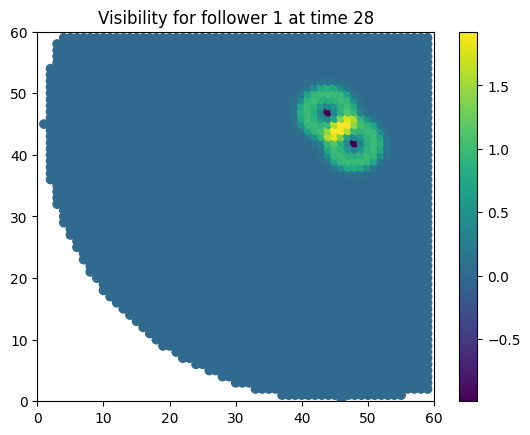

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2184  45  44  1.414214         1.0         1.0    0.998782        1    29   
2304  47  45  1.000000         1.0         0.0    0.999391        1    29   
2245  46  45  0.000000         0.0         0.0    1.000000        1    29   
2244  46  44  1.000000         0.0         1.0    0.999391        1    29   
2183  45  43  2.236068         1.0         2.0    0.996955        1    29   
2305  47  46  1.414214         1.0         1.0    0.998782        1    29   
2303  47  44  1.414214         1.0         1.0    0.998782        1    29   
2185  45  45  1.000000         1.0         0.0    0.999391        1    29   
2364  48  46  2.236068         2.0         1.0    0.996955        1    29   
2124  44  43  2.828427         2.0         2.0    0.995130        1    29   

      proximity  proximity_standardized  
2184   1.923293                9.914690  
2304   1.923293                9.914690  
2245   1.922682   

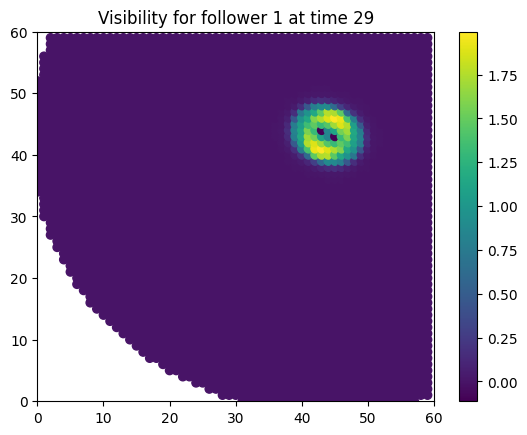

2024-10-29 20:08:24,295 - Generating frame 30/50 


options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2380  45  46  3.162278         1.0         3.0    0.993914        1    30   
2255  43  41  2.236068         1.0         2.0    0.996955        1    30   
2195  42  41  2.828427         2.0         2.0    0.995130        1    30   
2440  46  46  3.605551         2.0         3.0    0.992090        1    30   
2439  46  45  2.828427         2.0         2.0    0.995130        1    30   
2196  42  42  2.236068         2.0         1.0    0.996955        1    30   
2315  44  41  2.000000         0.0         2.0    0.997564        1    30   
2320  44  46  3.000000         0.0         3.0    0.994522        1    30   
2321  44  47  4.000000         0.0         4.0    0.990268        1    30   
2314  44  40  3.000000         0.0         3.0    0.994522        1    30   

      proximity  proximity_standardized  
2380   1.994195                9.273954  
2255   1.994195                9.273954  
2195   1.923293   

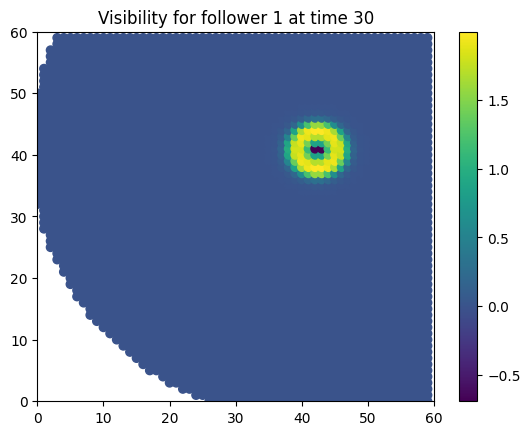

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2245  42  38  3.605551         2.0         3.0    0.992090        1    31   
2311  43  44  3.162278         1.0         3.0    0.993914        1    31   
2251  42  44  3.605551         2.0         3.0    0.992090        1    31   
2305  43  38  3.162278         1.0         3.0    0.993914        1    31   
2365  44  38  3.000000         0.0         3.0    0.994522        1    31   
2371  44  44  3.000000         0.0         3.0    0.994522        1    31   
2185  41  38  4.242641         3.0         3.0    0.989054        1    31   
2191  41  44  4.242641         3.0         3.0    0.989054        1    31   
2426  45  39  2.236068         1.0         2.0    0.996955        1    31   
2430  45  43  2.236068         1.0         2.0    0.996955        1    31   

      proximity  proximity_standardized  
2245   1.994806                8.688956  
2311   1.994806                8.688956  
2251   1.994806   

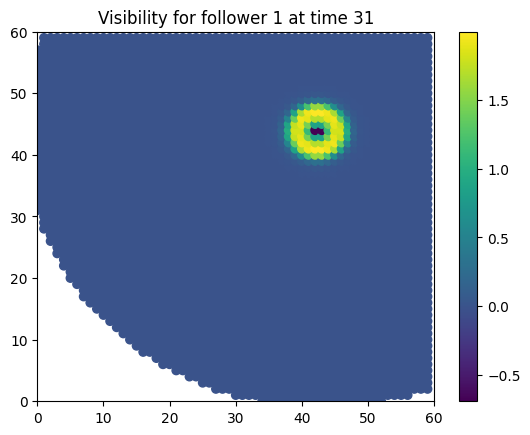

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2209  42  47  3.162278         1.0         3.0    0.993914        1    32   
2269  43  47  3.000000         0.0         3.0    0.994522        1    32   
2263  43  41  3.000000         0.0         3.0    0.994522        1    32   
2203  42  41  3.162278         1.0         3.0    0.993914        1    32   
2323  44  41  3.162278         1.0         3.0    0.993914        1    32   
2143  41  41  3.605551         2.0         3.0    0.992090        1    32   
2149  41  47  3.605551         2.0         3.0    0.992090        1    32   
2329  44  47  3.162278         1.0         3.0    0.993914        1    32   
2088  40  46  3.605551         3.0         2.0    0.992090        1    32   
2388  45  46  2.828427         2.0         2.0    0.995130        1    32   

      proximity  proximity_standardized  
2209   1.994806                8.615062  
2269   1.994806                8.615062  
2263   1.994806   

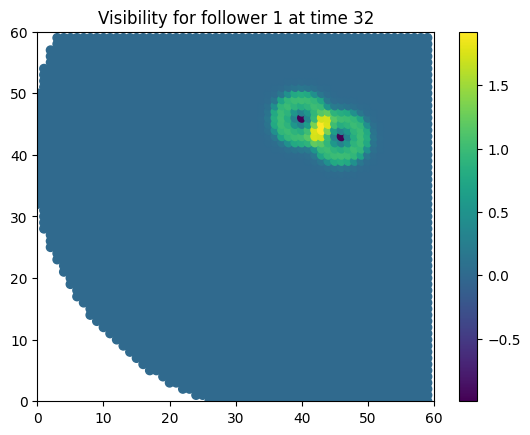

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2312  43  45  4.123106         1.0         4.0    0.989661        1    33   
2311  43  44  3.162278         1.0         3.0    0.993914        1    33   
2372  44  45  4.000000         0.0         4.0    0.990268        1    33   
2251  42  44  3.605551         2.0         3.0    0.992090        1    33   
2250  42  43  2.828427         2.0         2.0    0.995130        1    33   
2373  44  46  5.000000         0.0         5.0    0.984808        1    33   
2310  43  43  2.236068         1.0         2.0    0.996955        1    33   
2313  43  46  5.099020         1.0         5.0    0.984202        1    33   
2252  42  45  4.472136         2.0         4.0    0.987840        1    33   
2371  44  44  3.000000         0.0         3.0    0.994522        1    33   

      proximity  proximity_standardized  
2312   1.923293               10.487767  
2311   1.923293               10.487767  
2372   1.755373   

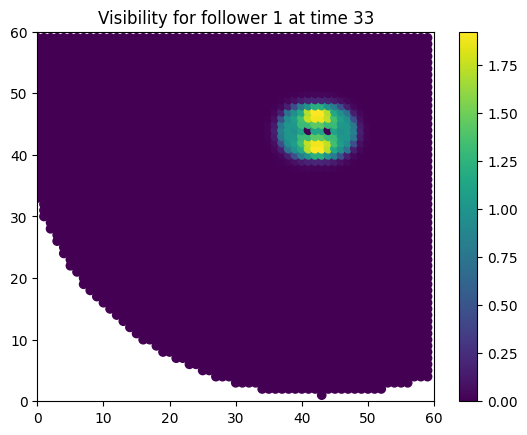

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2125  42  47  1.414214         1.0         1.0    0.998782        1    34   
2184  43  47  1.000000         0.0         1.0    0.999391        1    34   
2119  42  41  5.099020         1.0         5.0    0.984202        1    34   
2178  43  41  5.000000         0.0         5.0    0.984808        1    34   
2120  42  42  4.123106         1.0         4.0    0.989661        1    34   
2183  43  46  0.000000         0.0         0.0    1.000000        1    34   
2124  42  46  1.000000         1.0         0.0    0.999391        1    34   
2179  43  42  4.000000         0.0         4.0    0.990268        1    34   
2062  41  42  4.472136         2.0         4.0    0.987840        1    34   
2237  44  42  4.123106         1.0         4.0    0.989661        1    34   

      proximity  proximity_standardized  
2125   1.923293                9.156134  
2184   1.923293                9.156134  
2119   1.923293   

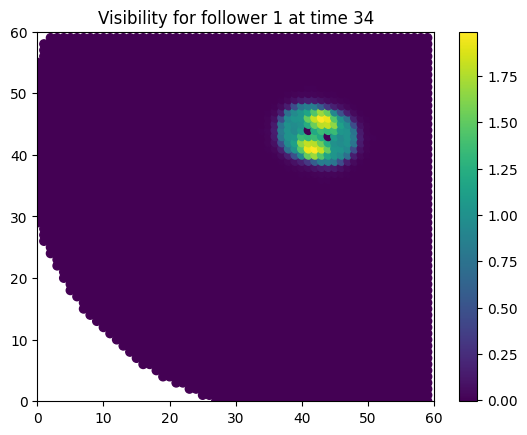

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2264  42  41  1.414214         1.0         1.0    0.998782        1    35   
2329  43  46  4.000000         0.0         4.0    0.990268        1    35   
2204  41  41  2.236068         2.0         1.0    0.996955        1    35   
2389  44  46  4.123106         1.0         4.0    0.989661        1    35   
2324  43  41  1.000000         0.0         1.0    0.999391        1    35   
2269  42  46  4.123106         1.0         4.0    0.989661        1    35   
2205  41  42  2.000000         2.0         0.0    0.997564        1    35   
2388  44  45  3.162278         1.0         3.0    0.993914        1    35   
2265  42  42  1.000000         1.0         0.0    0.999391        1    35   
2328  43  45  3.000000         0.0         3.0    0.994522        1    35   

      proximity  proximity_standardized  
2264   1.989001                9.822188  
2329   1.989001                9.822188  
2204   1.928487   

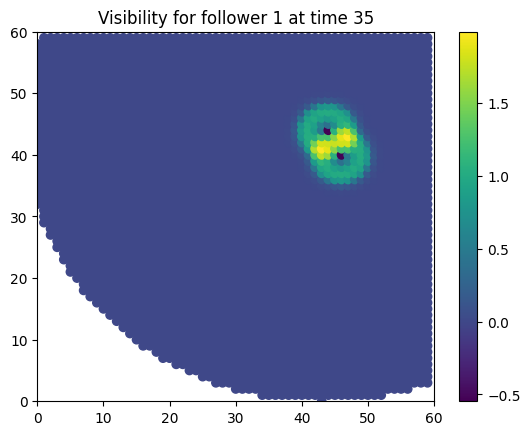

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2459  47  43  4.472136         4.0         2.0    0.987840        1    36   
2221  43  41  4.000000         0.0         4.0    0.990268        1    36   
2400  46  43  3.605551         3.0         2.0    0.992090        1    36   
2280  44  41  4.123106         1.0         4.0    0.989661        1    36   
2222  43  42  3.000000         0.0         3.0    0.994522        1    36   
2458  47  42  5.000000         4.0         3.0    0.984808        1    36   
2399  46  42  4.242641         3.0         3.0    0.989054        1    36   
2281  44  42  3.162278         1.0         3.0    0.993914        1    36   
2340  45  42  3.605551         2.0         3.0    0.992090        1    36   
2220  43  40  5.000000         0.0         5.0    0.984808        1    36   

      proximity  proximity_standardized  
2459   1.989613                9.939925  
2221   1.989613                9.939925  
2400   1.886998   

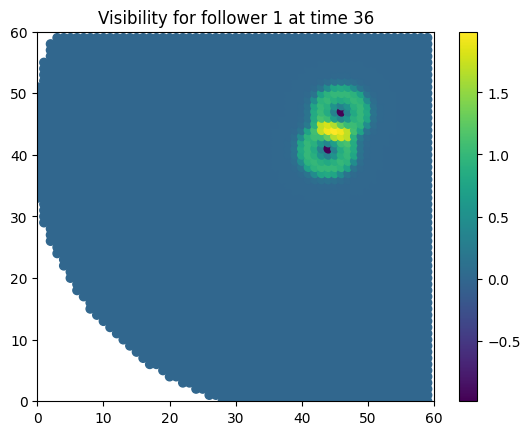

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2406  45  44  2.236068         1.0         2.0    0.996955        1    37   
2466  46  44  2.828427         2.0         2.0    0.995130        1    37   
2346  44  44  2.000000         0.0         2.0    0.997564        1    37   
2347  44  45  3.000000         0.0         3.0    0.994522        1    37   
2465  46  43  2.236068         2.0         1.0    0.996955        1    37   
2286  43  44  2.236068         1.0         2.0    0.996955        1    37   
2526  47  44  3.605551         3.0         2.0    0.992090        1    37   
2525  47  43  3.162278         3.0         1.0    0.993914        1    37   
2287  43  45  3.162278         1.0         3.0    0.993914        1    37   
2407  45  45  3.162278         1.0         3.0    0.993914        1    37   

      proximity  proximity_standardized  
2406   1.989613               10.621932  
2466   1.928487               10.289832  
2346   1.928487   

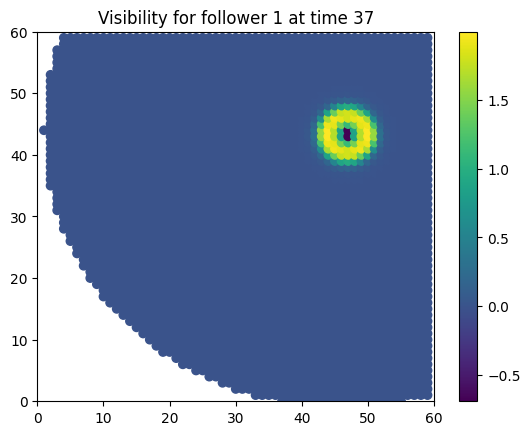

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2165  44  43  2.236068         2.0         1.0    0.996955        1    38   
2166  44  44  2.000000         2.0         0.0    0.997564        1    38   
2525  50  43  4.123106         4.0         1.0    0.989661        1    38   
2526  50  44  4.000000         4.0         0.0    0.990268        1    38   
2527  50  45  4.123106         4.0         1.0    0.989661        1    38   
2167  44  45  2.236068         2.0         1.0    0.996955        1    38   
2524  50  42  4.472136         4.0         2.0    0.987840        1    38   
2164  44  42  2.828427         2.0         2.0    0.995130        1    38   
2223  45  41  3.162278         1.0         3.0    0.993914        1    38   
2468  49  46  3.605551         3.0         2.0    0.992090        1    38   

      proximity  proximity_standardized  
2165   1.994806                8.404704  
2166   1.994806                8.404704  
2525   1.994806   

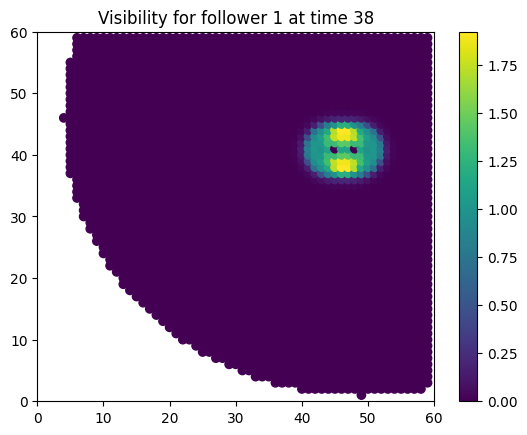

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2078  47  38  8.246211         2.0         8.0    0.958857        1    39   
2084  47  44  2.828427         2.0         2.0    0.995130        1    39   
2026  46  44  3.605551         3.0         2.0    0.992090        1    39   
2020  46  38  8.544004         3.0         8.0    0.955855        1    39   
2079  47  39  7.280110         2.0         7.0    0.967884        1    39   
2083  47  43  3.605551         2.0         3.0    0.992090        1    39   
2025  46  43  4.242641         3.0         3.0    0.989054        1    39   
2021  46  39  7.615773         3.0         7.0    0.964872        1    39   
2141  48  43  3.162278         1.0         3.0    0.993914        1    39   
2137  48  39  7.071068         1.0         7.0    0.969693        1    39   

      proximity  proximity_standardized  
2078   1.923293                8.670773  
2084   1.923293                8.670773  
2026   1.923293   

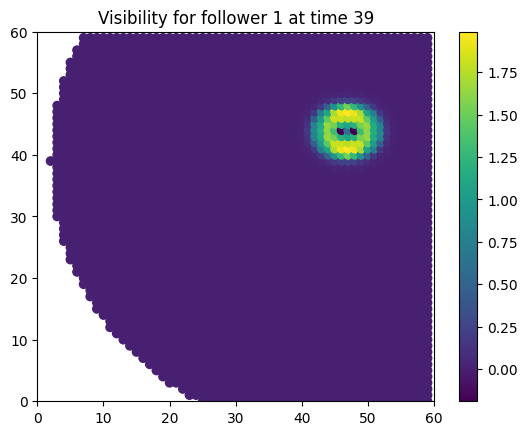

2024-10-29 20:08:26,672 - Generating frame 40/50 


options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2417  47  47  8.000000         0.0         8.0    0.961262        1    40   
2411  47  41  2.000000         0.0         2.0    0.997564        1    40   
2477  48  47  8.062258         1.0         8.0    0.960660        1    40   
2471  48  41  2.236068         1.0         2.0    0.996955        1    40   
2351  46  41  2.236068         1.0         2.0    0.996955        1    40   
2357  46  47  8.062258         1.0         8.0    0.960660        1    40   
2536  49  46  7.280110         2.0         7.0    0.967884        1    40   
2292  45  42  3.605551         2.0         3.0    0.992090        1    40   
2296  45  46  7.280110         2.0         7.0    0.967884        1    40   
2532  49  42  3.605551         2.0         3.0    0.992090        1    40   

      proximity  proximity_standardized  
2417   1.989613                9.001464  
2411   1.989613                9.001464  
2477   1.928487   

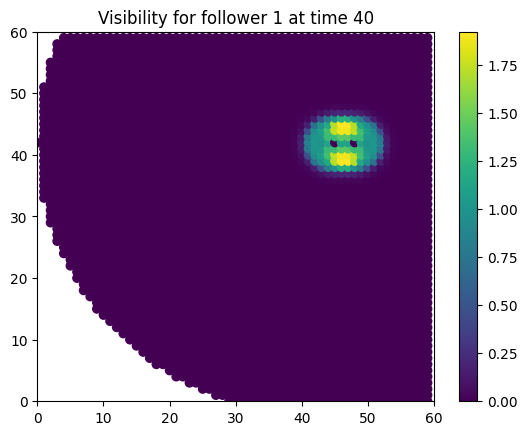

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2402  46  39  3.162278         1.0         3.0    0.993914        1    41   
2462  47  39  3.605551         2.0         3.0    0.992090        1    41   
2468  47  45  3.605551         2.0         3.0    0.992090        1    41   
2408  46  45  3.162278         1.0         3.0    0.993914        1    41   
2403  46  40  2.236068         1.0         2.0    0.996955        1    41   
2463  47  40  2.828427         2.0         2.0    0.995130        1    41   
2407  46  44  2.236068         1.0         2.0    0.996955        1    41   
2467  47  44  2.828427         2.0         2.0    0.995130        1    41   
2523  48  40  3.605551         3.0         2.0    0.992090        1    41   
2347  45  44  2.000000         0.0         2.0    0.997564        1    41   

      proximity  proximity_standardized  
2402   1.923293                9.285566  
2462   1.923293                9.285566  
2468   1.923293   

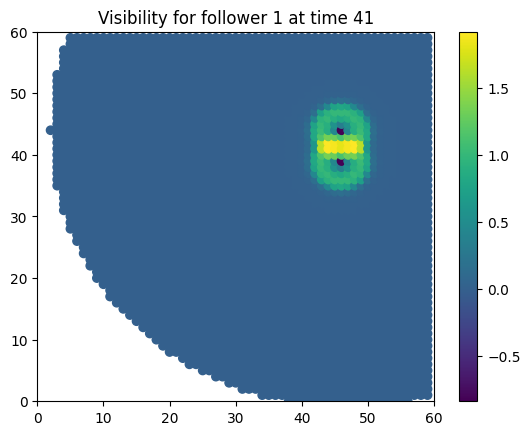

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2103  44  41  4.242641         3.0         3.0    0.989054        1    42   
2344  48  42  2.236068         1.0         2.0    0.996955        1    42   
2104  44  42  3.605551         3.0         2.0    0.992090        1    42   
2343  48  41  3.162278         1.0         3.0    0.993914        1    42   
2163  45  41  3.605551         2.0         3.0    0.992090        1    42   
2284  47  42  2.000000         0.0         2.0    0.997564        1    42   
2283  47  41  3.000000         0.0         3.0    0.994522        1    42   
2164  45  42  2.828427         2.0         2.0    0.995130        1    42   
2223  46  41  3.162278         1.0         3.0    0.993914        1    42   
2224  46  42  2.236068         1.0         2.0    0.996955        1    42   

      proximity  proximity_standardized  
2103   1.922682                9.436921  
2344   1.922682                9.436921  
2104   1.922682   

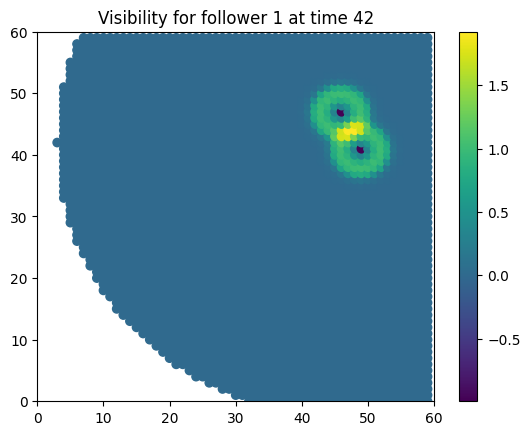

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2287  47  44  2.236068         1.0         2.0    0.996955        1    43   
2347  48  44  2.000000         0.0         2.0    0.997564        1    43   
2286  47  43  1.414214         1.0         1.0    0.998782        1    43   
2348  48  45  3.000000         0.0         3.0    0.994522        1    43   
2408  49  45  3.162278         1.0         3.0    0.993914        1    43   
2226  46  43  2.236068         2.0         1.0    0.996955        1    43   
2407  49  44  2.236068         1.0         2.0    0.996955        1    43   
2227  46  44  2.828427         2.0         2.0    0.995130        1    43   
2288  47  45  3.162278         1.0         3.0    0.993914        1    43   
2346  48  43  1.000000         0.0         1.0    0.999391        1    43   

      proximity  proximity_standardized  
2287   1.923293               10.057639  
2347   1.923293               10.057639  
2286   1.755373   

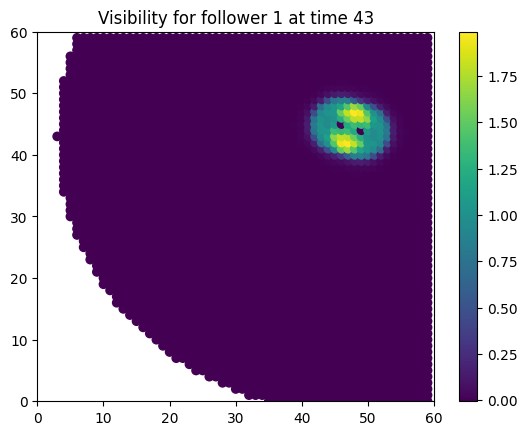

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2322  48  47  4.000000         0.0         4.0    0.990268        1    44   
2257  47  42  1.414214         1.0         1.0    0.998782        1    44   
2197  46  42  2.236068         2.0         1.0    0.996955        1    44   
2382  49  47  4.123106         1.0         4.0    0.989661        1    44   
2317  48  42  1.000000         0.0         1.0    0.999391        1    44   
2262  47  47  4.123106         1.0         4.0    0.989661        1    44   
2381  49  46  3.162278         1.0         3.0    0.993914        1    44   
2198  46  43  2.000000         2.0         0.0    0.997564        1    44   
2321  48  46  3.000000         0.0         3.0    0.994522        1    44   
2258  47  43  1.000000         1.0         0.0    0.999391        1    44   

      proximity  proximity_standardized  
2322   1.989001                9.350244  
2257   1.989001                9.350244  
2197   1.928487   

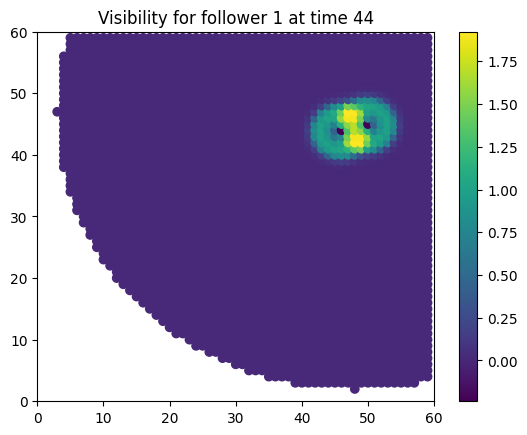

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2212  49  42  5.099020         1.0         5.0    0.984202        1    45   
2102  47  47  1.000000         1.0         0.0    0.999391        1    45   
2160  48  47  0.000000         0.0         0.0    1.000000        1    45   
2155  48  42  5.000000         0.0         5.0    0.984808        1    45   
2101  47  46  1.414214         1.0         1.0    0.998782        1    45   
2213  49  43  4.123106         1.0         4.0    0.989661        1    45   
2156  48  43  4.000000         0.0         4.0    0.990268        1    45   
2159  48  46  1.000000         0.0         1.0    0.999391        1    45   
2157  48  44  3.000000         0.0         3.0    0.994522        1    45   
2158  48  45  2.000000         0.0         2.0    0.997564        1    45   

      proximity  proximity_standardized  
2212   1.923293                8.983202  
2102   1.923293                8.983202  
2160   1.922682   

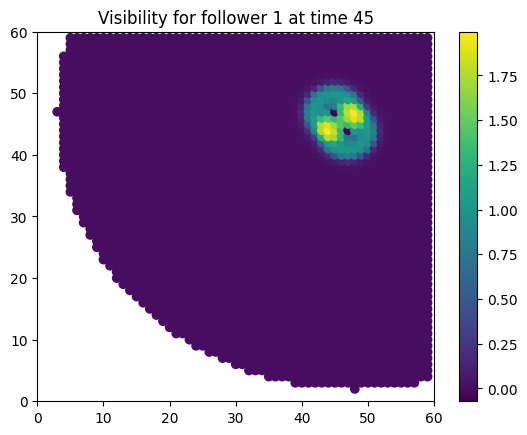

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2160  48  47  0.000000         0.0         0.0    1.000000        1    46   
1928  44  44  5.000000         4.0         3.0    0.984808        1    46   
2159  48  46  1.000000         0.0         1.0    0.999391        1    46   
1929  44  45  4.472136         4.0         2.0    0.987840        1    46   
1985  45  44  4.242641         3.0         3.0    0.989054        1    46   
2102  47  47  1.000000         1.0         0.0    0.999391        1    46   
1927  44  43  5.656854         4.0         4.0    0.980568        1    46   
2161  48  48  1.000000         0.0         1.0    0.999391        1    46   
2216  49  46  1.414214         1.0         1.0    0.998782        1    46   
1872  43  45  5.385165         5.0         2.0    0.982384        1    46   

      proximity  proximity_standardized  
2160   1.994806                9.206224  
1928   1.994806                9.206224  
2159   1.881805   

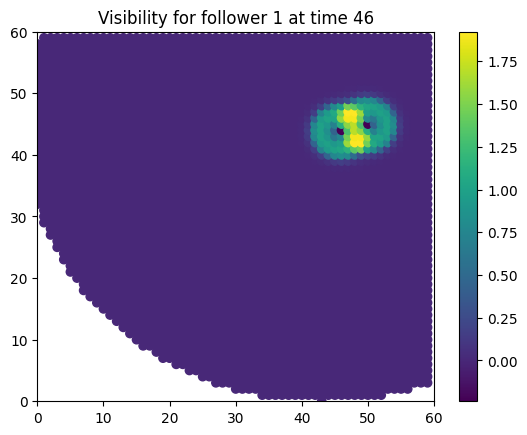

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2576  49  42  6.708204         6.0         3.0    0.972709        1    47   
2463  47  47  4.472136         4.0         2.0    0.987840        1    47   
2517  48  42  5.830952         5.0         3.0    0.979357        1    47   
2522  48  47  5.385165         5.0         2.0    0.982384        1    47   
2577  49  43  6.324555         6.0         2.0    0.975729        1    47   
2462  47  46  4.123106         4.0         1.0    0.989661        1    47   
2518  48  43  5.385165         5.0         2.0    0.982384        1    47   
2521  48  46  5.099020         5.0         1.0    0.984202        1    47   
2519  48  44  5.099020         5.0         1.0    0.984202        1    47   
2520  48  45  5.000000         5.0         0.0    0.984808        1    47   

      proximity  proximity_standardized  
2576   1.923293                9.571300  
2463   1.923293                9.571300  
2517   1.922682   

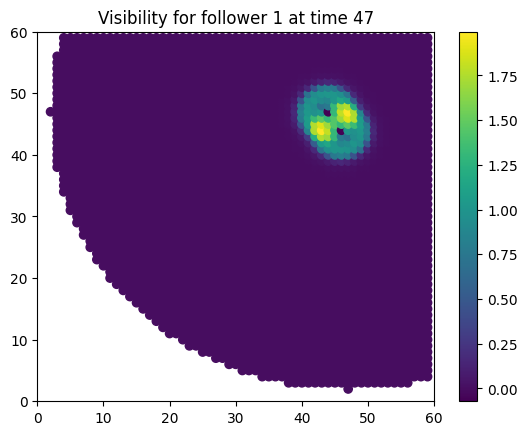

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
1928  43  44  5.000000         4.0         3.0    0.984808        1    48   
2160  47  47  0.000000         0.0         0.0    1.000000        1    48   
2159  47  46  1.000000         0.0         1.0    0.999391        1    48   
1929  43  45  4.472136         4.0         2.0    0.987840        1    48   
1985  44  44  4.242641         3.0         3.0    0.989054        1    48   
2102  46  47  1.000000         1.0         0.0    0.999391        1    48   
1927  43  43  5.656854         4.0         4.0    0.980568        1    48   
2161  47  48  1.000000         0.0         1.0    0.999391        1    48   
1872  42  45  5.385165         5.0         2.0    0.982384        1    48   
2216  48  46  1.414214         1.0         1.0    0.998782        1    48   

      proximity  proximity_standardized  
1928   1.994806                9.298404  
2160   1.994806                9.298404  
2159   1.881805   

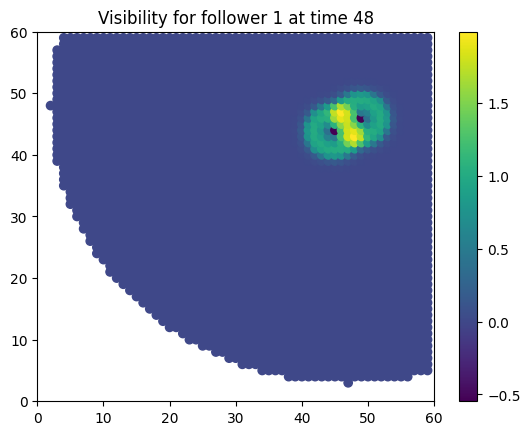

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2168  48  43  5.099020         1.0         5.0    0.984202        1    49   
2059  46  47  1.414214         1.0         1.0    0.998782        1    49   
2169  48  44  4.123106         1.0         4.0    0.989661        1    49   
2058  46  46  2.236068         1.0         2.0    0.996955        1    49   
2112  47  43  5.000000         0.0         5.0    0.984808        1    49   
2116  47  47  1.000000         0.0         1.0    0.999391        1    49   
2115  47  46  2.000000         0.0         2.0    0.997564        1    49   
2113  47  44  4.000000         0.0         4.0    0.990268        1    49   
2114  47  45  3.000000         0.0         3.0    0.994522        1    49   
2003  45  47  2.236068         2.0         1.0    0.996955        1    49   

      proximity  proximity_standardized  
2168   1.989613                9.330113  
2059   1.989613                9.330113  
2169   1.886998   

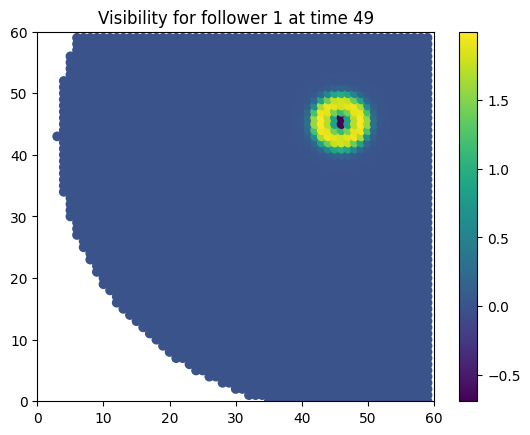

options        x   y  distance  distance_x  distance_y  visibility  forager  time  \
2381  49  46  3.162278         1.0         3.0    0.993914        1    50   
2380  49  45  2.236068         1.0         2.0    0.996955        1    50   
2021  43  46  5.830952         5.0         3.0    0.979357        1    50   
2020  43  45  5.385165         5.0         2.0    0.982384        1    50   
2022  43  47  6.403124         5.0         4.0    0.975125        1    50   
2019  43  44  5.099020         5.0         1.0    0.984202        1    50   
2382  49  47  4.123106         1.0         4.0    0.989661        1    50   
2379  49  44  1.414214         1.0         1.0    0.998782        1    50   
2078  44  43  4.000000         4.0         0.0    0.990268        1    50   
2318  48  43  0.000000         0.0         0.0    1.000000        1    50   

      proximity  proximity_standardized  
2381   1.994806                8.289115  
2380   1.994806                8.289115  
2021   1.994806   

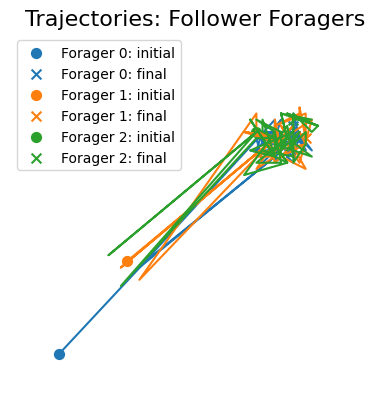

In [2]:
random.seed(23)
np.random.seed(23)

# create a new empty simulation (a starting point for the actual simulation)
grid_size = 60
follower_sim = rhf.Foragers(
    grid_size=grid_size,
    num_foragers=3,
    num_frames=num_frames,
    num_rewards=30,
    grab_range=3,
)

# run the simulation: this places the rewards on the grid
follower_sim()

# add the followers to the simulation and run simulation forward
follower_sim = rhf.add_follower_foragers(
    follower_sim,
    num_follower_foragers=3,
    visibility_range=45,
    getting_worse=.5,
    optimal=3,
    proximity_decay=2,
    initial_positions=np.array([[10, 10], [20, 20], [40, 40]]),
)

# display(follower_sim.foragersDF)
ax = ft.plot_trajectories(follower_sim.foragersDF, "Follower Foragers")
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
plt.show()

Unsurprisingly, all the foragers tend to stay close to each other and do not explore the environment.

In [4]:
ft.animate_foragers(
    follower_sim, width=600, height=400, plot_rewards=True, point_size=6,
    autosize=True
)

## Derived quantities

In [7]:
# We'll use `proximity`, `food` and `access` predictors

local_windows_kwargs = {
    "window_size": 10,
    "sampling_fraction": 1,
    "skip_incomplete_frames": False,
}

predictor_kwargs = {
    "proximity": {
        "interaction_length": follower_sim.grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": {},
        "repulsion_radius": 1.5,
        "optimal_distance": 4,
        "proximity_decay": 1,
    },
    "food": {
        "decay_factor": 0.5,
    },
    "access": {
        "decay_factor": 0.2,
    },
}

score_kwargs = {
    "nextStep_linear": {"nonlinearity_exponent": 1},
    "nextStep_sublinear": {"nonlinearity_exponent": 0.5},
}

derivedDF_hungry = ft.derive_predictors_and_scores(
    follower_sim,
    local_windows_kwargs,
    predictor_kwargs=predictor_kwargs,
    score_kwargs=score_kwargs,
    dropna=True,
    add_scaled_values=True,
)

# display(derivedDF_hungry)

IndexError: list assignment index out of range

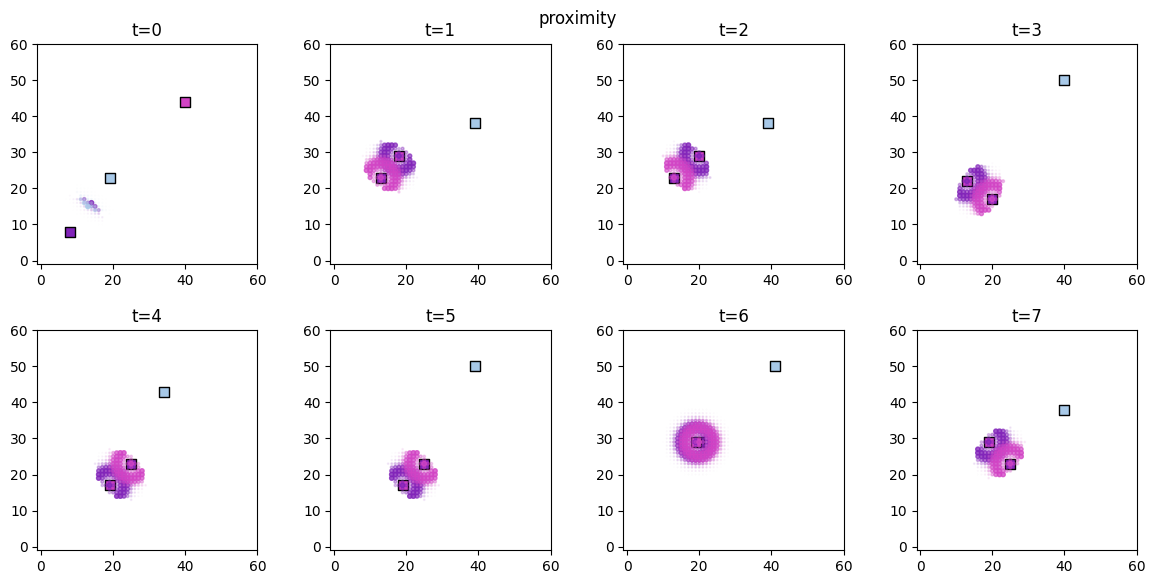

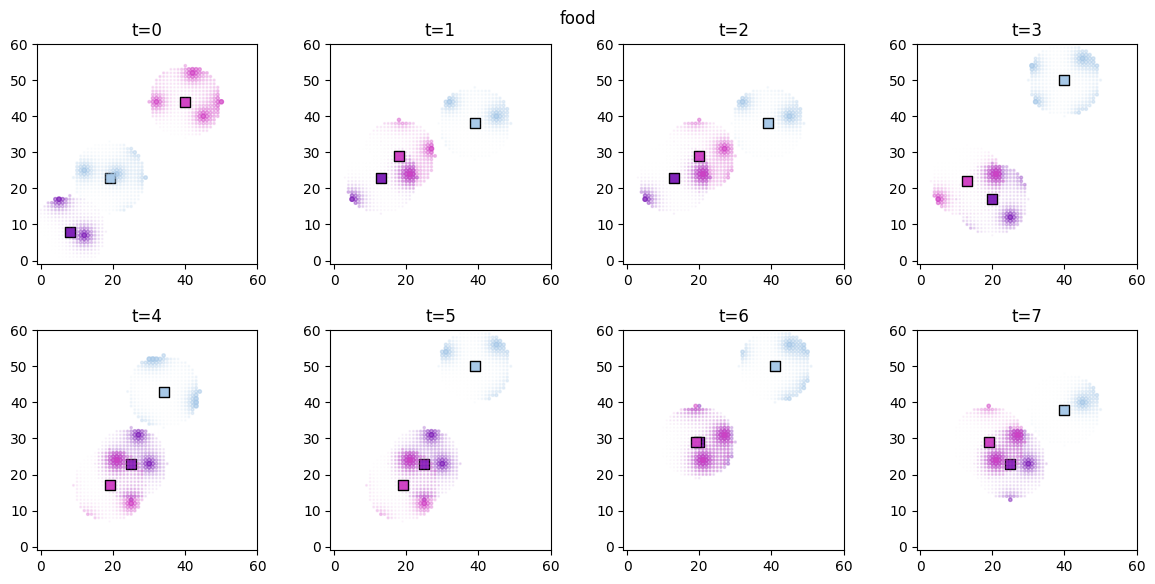

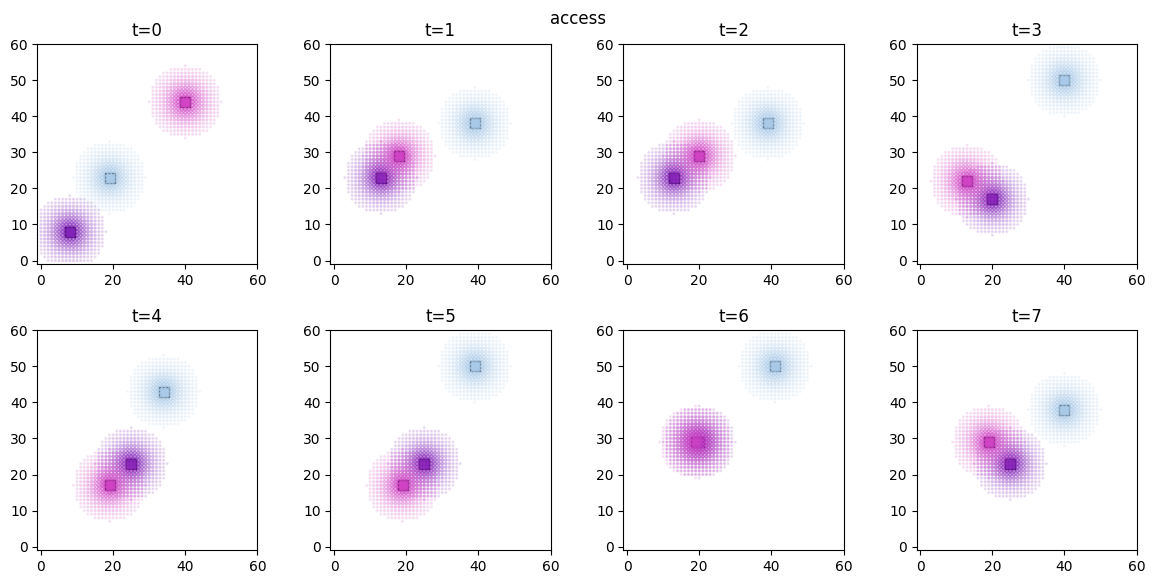

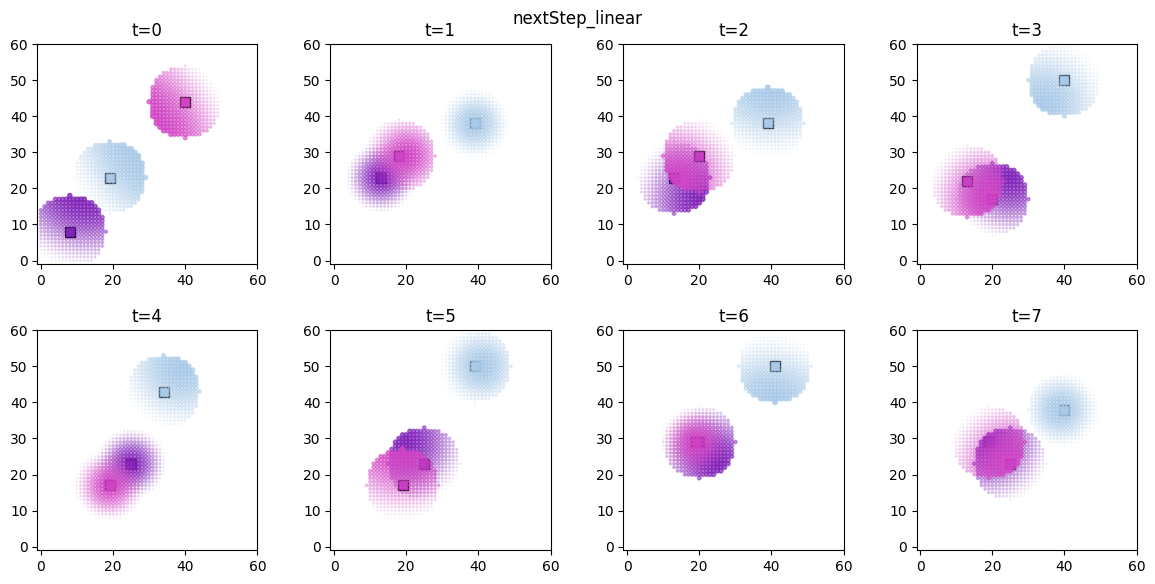

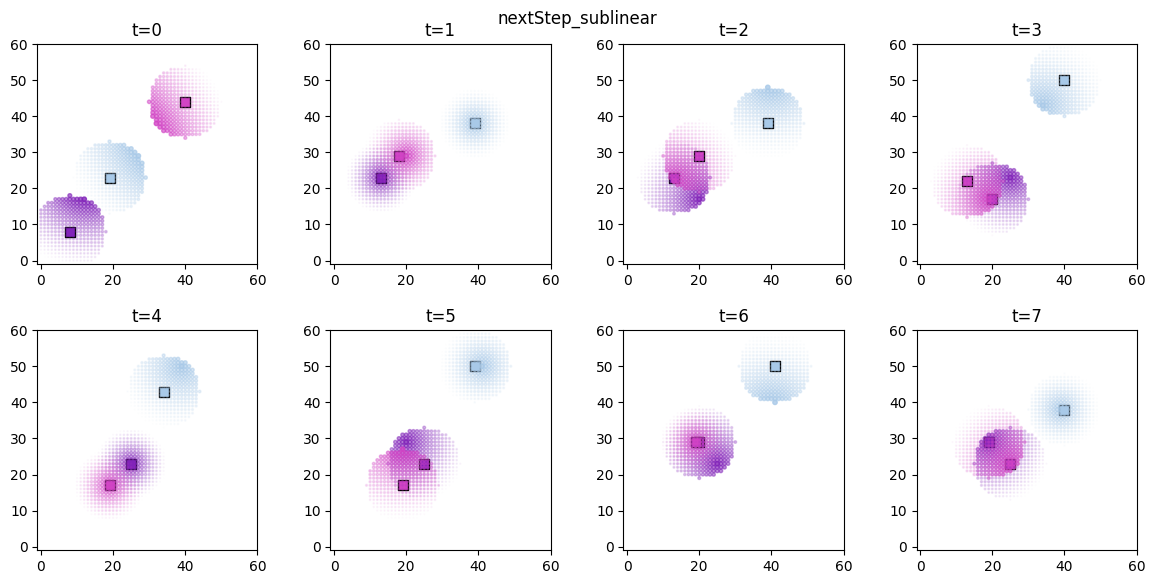

In [7]:
# visualize the spatial distributions of the derived quantities for each forager

for derived_quantity_name in follower_sim.derived_quantities.keys():
    ft.plot_predictor(
        follower_sim.foragers,
        follower_sim.derived_quantities[derived_quantity_name],
        predictor_name=derived_quantity_name,
        time=range(min(8, num_frames)),
        grid_size=grid_size,
        size_multiplier=10,
        random_state=99,
        forager_position_indices=[0, 1, 2],
        forager_predictor_indices=[0, 1, 2],
    )
    plt.suptitle(derived_quantity_name)
    plt.show()

## Inference

2024-10-28 15:41:56,833 - Sample size: 46579
2024-10-28 15:41:56,834 - Starting SVI inference with 1500 iterations.


[iteration 0001] loss: 171636.7500
[iteration 0200] loss: 118194.7422
[iteration 0400] loss: 117138.3047
[iteration 0600] loss: 116770.8984
[iteration 0800] loss: 116844.3672
[iteration 1000] loss: 116756.9297
[iteration 1200] loss: 116830.6797
[iteration 1400] loss: 116767.6172


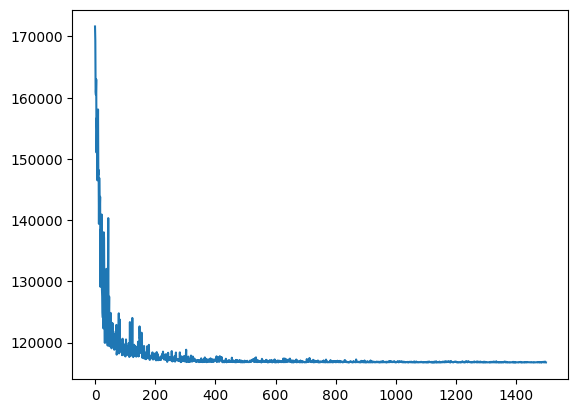

2024-10-28 15:42:06,200 - SVI inference completed in 9.37 seconds.


Coefficient marginals:
Site: weight_continuous_proximity_scaled_nextStep_sublinear
       mean       std        5%       25%       50%       75%       95%
0  0.196394  0.015694  0.170974  0.186028  0.196538  0.206734  0.221458 

Site: weight_continuous_food_scaled_nextStep_sublinear
       mean       std        5%       25%       50%       75%       95%
0 -0.116813  0.013537 -0.137824 -0.126386 -0.116534 -0.107433 -0.095386 

Site: weight_continuous_access_scaled_nextStep_sublinear
       mean       std        5%       25%      50%       75%       95%
0  0.404285  0.014196  0.381239  0.394556  0.40416  0.414433  0.426971 



In [6]:
# prepare the training data

predictors = ["proximity_scaled", "food_scaled", "access_scaled"]
outcome_vars = ["nextStep_sublinear"]


predictor_tensors_follower, outcome_tensor_follower = ft.prep_data_for_inference(
    follower_sim, predictors, outcome_vars
)

# construct Pyro model
model_sigmavar_follower = ft.HeteroskedasticLinear(
    predictor_tensors_follower, outcome_tensor_follower
)

# runs SVI to approximate the posterior and samples from it
results_follower = ft.get_samples(
    model=model_sigmavar_follower,
    predictors=predictor_tensors_follower,
    outcome=outcome_tensor_follower,
    num_svi_iters=1500,
    num_samples=1000,
)

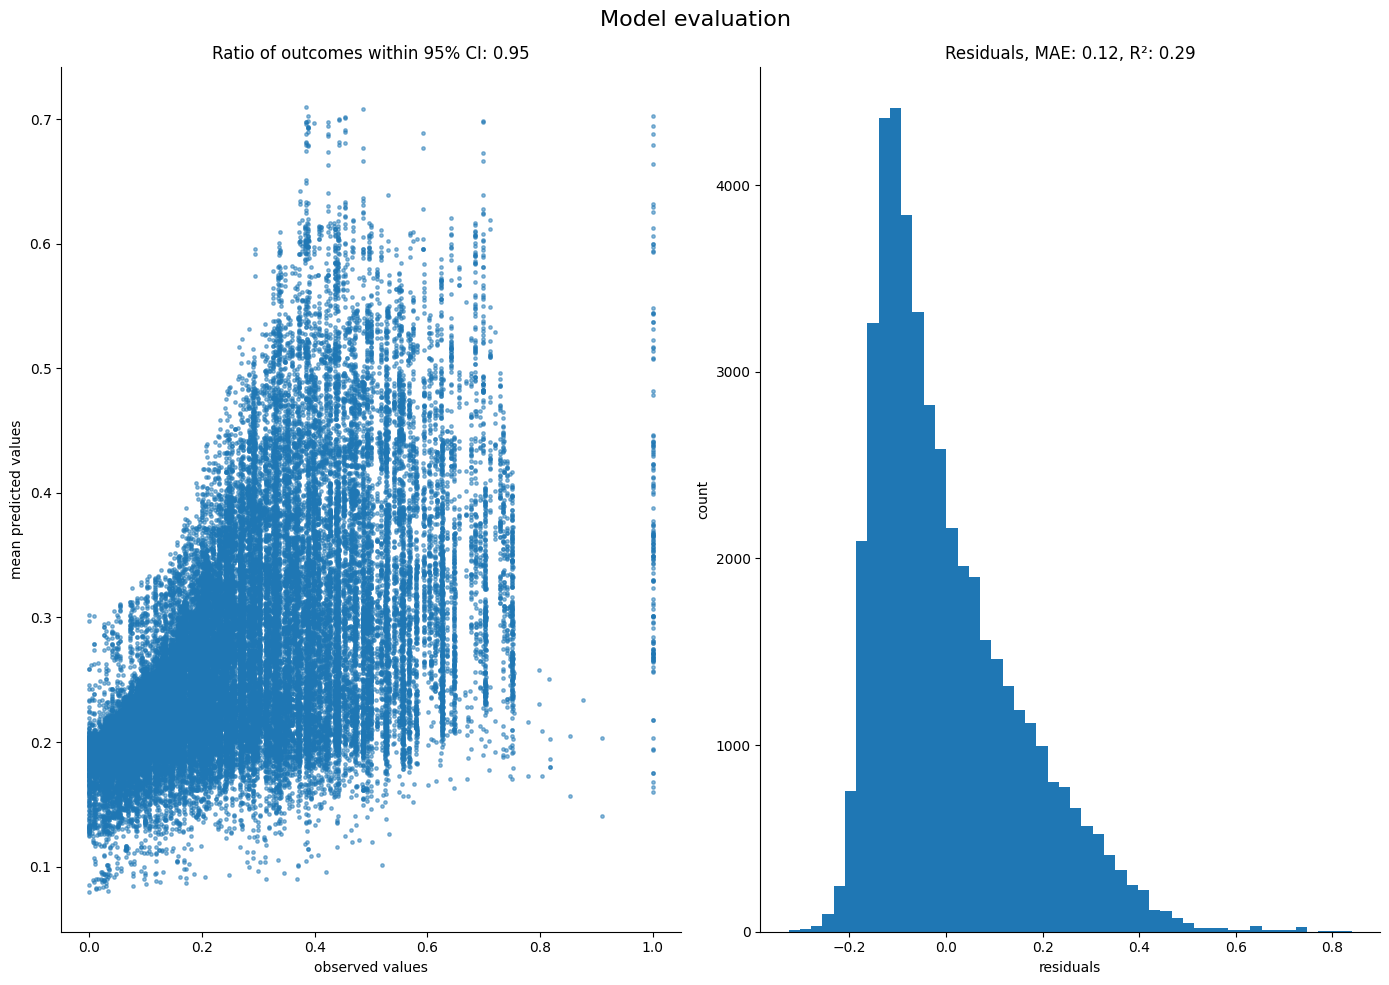

In [7]:
selected_sites = [
    key
    for key in results_follower["samples"].keys()
    if key.startswith("weight") and not key.endswith("sigma")
]
selected_samples = {key: results_follower["samples"][key] for key in selected_sites}

ft.plot_coefs(
    selected_samples, "Follower foragers", nbins=120, ann_start_y=160, ann_break_y=50
)

# save the samples for future use
if not os.path.exists("sim_data/follower_foragers_samples.dill"):
    with open(os.path.join("sim_data", "follower_foragers_samples.dill"), "wb") as f:
        dill.dump(selected_samples, f)

ft.evaluate_performance(
    model=model_sigmavar_follower,
    guide=results_follower["guide"],
    predictors=predictor_tensors_follower,
    outcome=outcome_tensor_follower,
    num_samples=1000,
)

As expected, both `access` and `proximity` are now significant in explaining the agent movements, while `food` has no effect.